<a href="https://colab.research.google.com/github/SeojinSeojin/deep-learning_challenge/blob/main/Mnist_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -O https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3655  100  3655    0     0  22843      0 --:--:-- --:--:-- --:--:-- 22843


In [2]:
import sys, os
import pickle
import numpy as np
from mnist import load_mnist
sys.path.append(os.pardir)

In [3]:
# 시그모이드 함수 정의하기
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [4]:
# 소프트맥스 함수 정의하기
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [11]:
# mnist.py에 있는 load_mnist() 함수를 사용해 변수에 저장
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl

View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기

In [5]:
# network라는 변수에 pkl파일을 rb모드로 읽은 값 저장
# pickle.load()함수 사용
with open("sample_weight.pkl", "rb") as f:
  network = pickle.load(f)
print(network.keys())

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])


In [18]:
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

In [15]:
# 예측 함수 정의하기
  # x_train에 있는 값에 대해서는 W1과 b1로 가중치 연산
    # 의 결과값에 (1)를 적용한 후 W2와 b2로 가중치 연산
      # 의 결과값에 (1)를 적용한 후 W3과 b3으로 가중치 연산
        # 의 결과값을 (2)를 적용한 후, 가장 큰 확률을 가진 친구를 답으로 삼음
# (1) : 시그모이드 함수
# (2) : 소프트맥스 함수

def predict(network, x):
  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [19]:
# 돌려보고 Accuracy 확인
accuracy_cnt = 0

for i in range(len(x_test)):
  y = predict(network, x_test[i])
  p = np.argmax(y)
  if p == t_test[i]:
    accuracy_cnt += 1

print("Accuracy:"+str(float(accuracy_cnt)/len(x_test)))

Accuracy:0.9352


## 추가 과제
1. Sigmoid 함수 대신 Relu를 사용하고 Accuracy 값 비교하기
2. Sigmoid 함수, Relu 함수를 사용하기에 적합한 상황이 무엇인지 조사하고, 위의 결과가 나온 이유 설명하기 

In [20]:
# Relu 함수 정의하기
def relu(x):
  return np.maximum(0,x)

In [21]:
# 예측 함수 정의하고 
# Accuracy 확인하기
accurancy_cnt = 0

for i in range(len(x_test)):  
  a1 = np.dot(x_test[i],W1) + b1
  z1 = relu(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = relu(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  
  p = np.argmax(y)
  if p == t_test[i]:
    accurancy_cnt += 1

print("Accuracy : " + str(float(accurancy_cnt)/len(x_test)))

Accuracy : 0.8415


## 추가 과제 2

1. batch처리를 한다
2. batch_size가 달라질 때마다 함수 실행 시간이 얼마나 달라지는지 측정하고 결과를 표로 표시한다
* 예시
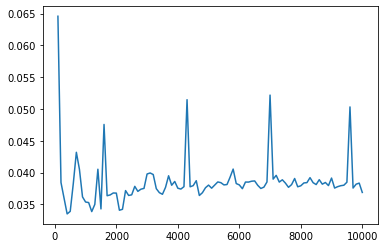

In [23]:
import time

def predict_by_batch(batch_size):
  accuracy_cnt = 0
  for i in range(0,len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t_test[i:i+batch_size])

# 실행시간 측정하기

batch_sizes = [((x+1)*100) for x in range(50)]
times = []

for bs in batch_sizes :
  s = time.time()
  predict_by_batch(bs)
  e = time.time()
  times.append(e-s)
  time.sleep(0.5)

In [24]:
print(times)

[0.07074809074401855, 0.048531293869018555, 0.03986001014709473, 0.03782248497009277, 0.0405879020690918, 0.03926682472229004, 0.03950619697570801, 0.037662506103515625, 0.03780794143676758, 0.040281057357788086, 0.04081153869628906, 0.037436485290527344, 0.043396949768066406, 0.04227471351623535, 0.037161827087402344, 0.03782820701599121, 0.04255032539367676, 0.04205489158630371, 0.04002809524536133, 0.03727102279663086, 0.042815446853637695, 0.041539669036865234, 0.0456695556640625, 0.0386505126953125, 0.04055953025817871, 0.0388185977935791, 0.03903341293334961, 0.04250073432922363, 0.04457259178161621, 0.04157209396362305, 0.04964399337768555, 0.03996610641479492, 0.040494441986083984, 0.04215526580810547, 0.041192054748535156, 0.04002976417541504, 0.03871321678161621, 0.04286479949951172, 0.038642168045043945, 0.04135274887084961, 0.044808387756347656, 0.03971457481384277, 0.03955078125, 0.0402522087097168, 0.03947257995605469, 0.037891387939453125, 0.03881120681762695, 0.03855657

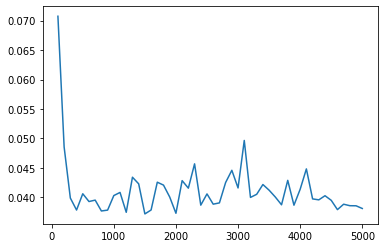

In [25]:
from matplotlib import pyplot as plt

# 도표 그리기
plt.plot(batch_sizes, times)
plt.show()